In [1]:
import tensorflow as tf

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8881 - loss: 0.3731 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9798 - loss: 0.0645 - val_accuracy: 0.9817 - val_loss: 0.0607
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9861 - loss: 0.0426 - val_accuracy: 0.9820 - val_loss: 0.0591
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9914 - loss: 0.0272 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9828 - val_loss: 0.0635
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9851 - val_loss: 0.0581
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9839 - val_loss: 0.0604
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9973 -

In [5]:
import numpy as np

# Make predictions
predictions = model.predict(x_test)

# Convert predictions to class labels (0-9)
predicted_labels = np.argmax(predictions, axis=1)

# Print first 10 predictions
print("Predicted labels:", predicted_labels[:10])
print("Actual labels:   ", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


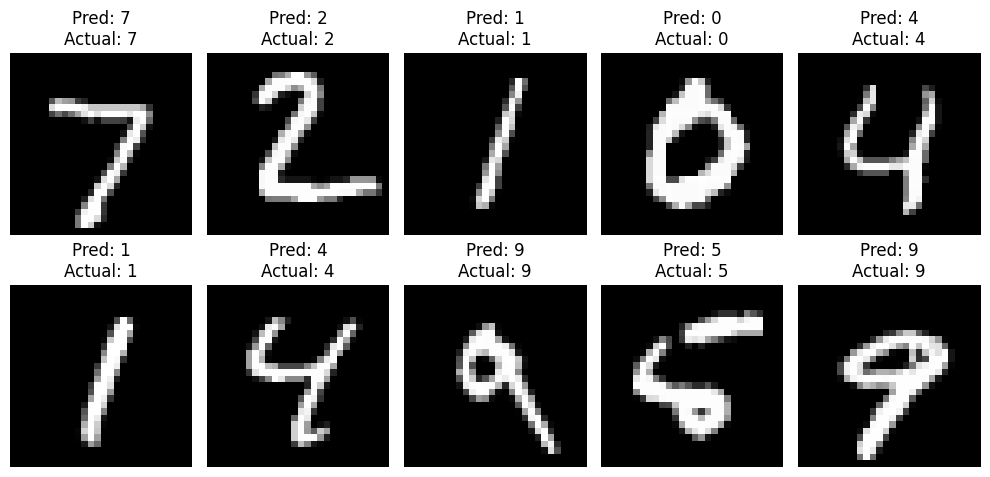

In [6]:
import matplotlib.pyplot as plt

# Plot the first 10 test images and their predictions
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap="gray")  # Show image in grayscale
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {y_test[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


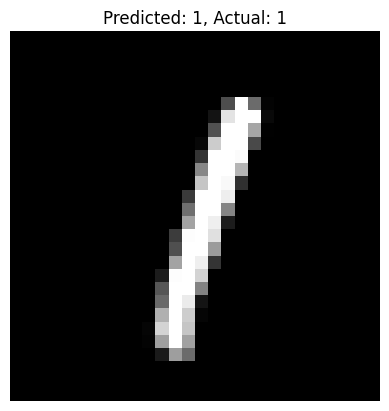

In [7]:
index = 5  # Change this to test a different image
plt.imshow(x_test[index], cmap="gray")
plt.title(f"Predicted: {predicted_labels[index]}, Actual: {y_test[index]}")
plt.axis("off")
plt.show()


In [8]:
# Save the trained model
model.save("mnist_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [10]:
from google.colab import files
files.download("mnist_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_cnn_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [31]:
from google.colab import files
uploaded = files.upload()


Saving task3(0).jfif to task3(0) (1).jfif


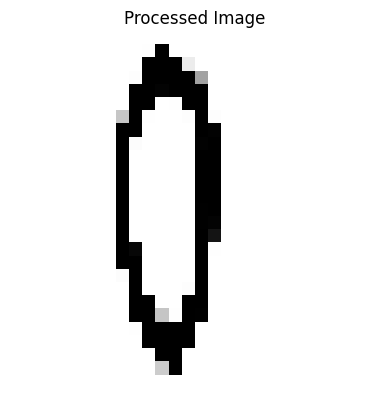

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image (change filename accordingly)
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Resize to 28x28 (same as MNIST images)
image = cv2.resize(image, (28, 28))

# Invert colors (MNIST background is black, but your image might be white)
image = cv2.bitwise_not(image)

# Normalize pixel values (0 to 1)
image = image / 255.0

# Reshape to match model input shape (28, 28, 1)
image = image.reshape(1, 28, 28, 1)

# Show the image
plt.imshow(image[0], cmap="gray")
plt.title("Processed Image")
plt.axis("off")
plt.show()


In [33]:
# Make prediction
prediction = loaded_model.predict(image)
predicted_label = np.argmax(prediction)

# Show the prediction
print(f"Predicted Digit: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Digit: 0
